In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("weatherHistory.csv")

# View first rows
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

df = df.assign(
    Year=df['Formatted Date'].dt.year,
    Month=df['Formatted Date'].dt.month,
    Day=df['Formatted Date'].dt.day
)


In [6]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)


In [7]:
yearly_temp = df.groupby('Year')['Temperature (C)'].mean()

print(yearly_temp.head())


Year
2006.0    17.396024
2007.0    17.547665
2008.0    17.733115
2009.0    18.661113
2010.0    16.887860
Name: Temperature (C), dtype: float64


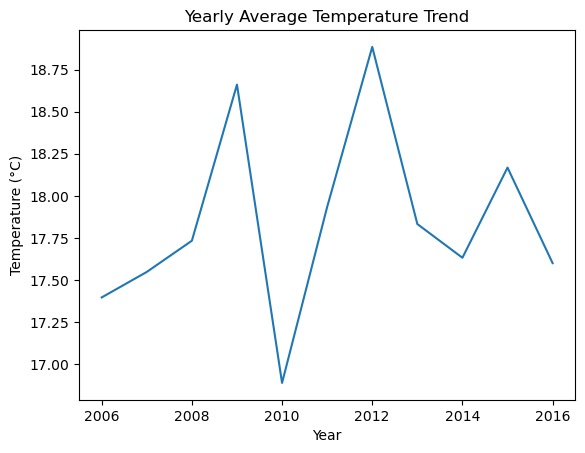

In [8]:
plt.figure()
yearly_temp.plot(title='Yearly Average Temperature Trend')
plt.ylabel('Temperature (°C)')
plt.show()


In [9]:
seasonal_temp = df.groupby('Season')['Temperature (C)'].mean()
print(seasonal_temp)


Season
Autumn     6.639862
Spring    14.602822
Summer    22.022449
Name: Temperature (C), dtype: float64


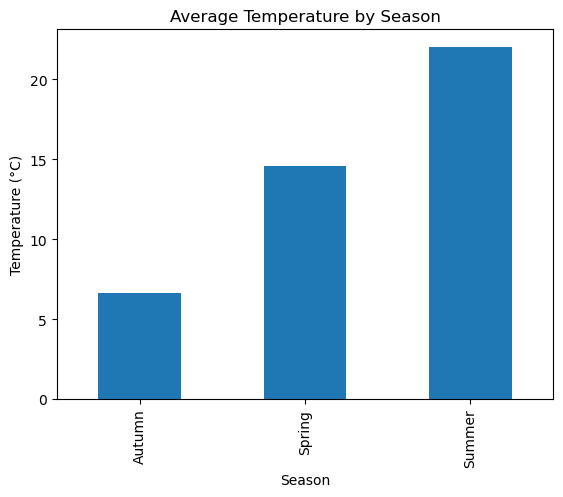

In [10]:
seasonal_temp.plot(kind='bar', title='Average Temperature by Season')
plt.ylabel('Temperature (°C)')
plt.show()


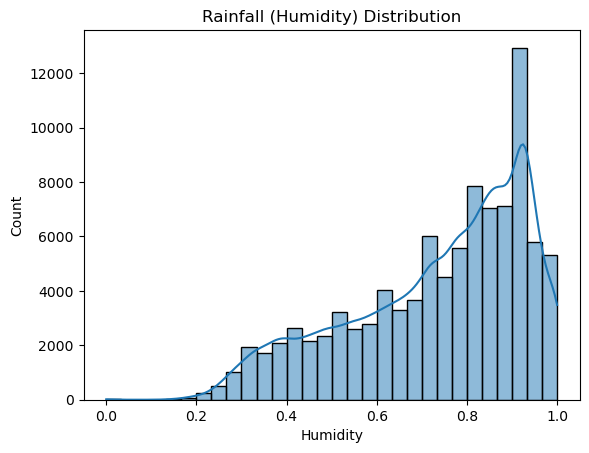

In [11]:
plt.figure()
sns.histplot(df['Humidity'], bins=30, kde=True)
plt.title('Rainfall (Humidity) Distribution')
plt.xlabel('Humidity')
plt.show()


In [12]:
high_temp_threshold = df['Temperature (C)'].quantile(0.95)
low_temp_threshold = df['Temperature (C)'].quantile(0.05)


In [13]:
extreme_events = df[
    (df['Temperature (C)'] > high_temp_threshold) |
    (df['Temperature (C)'] < low_temp_threshold)
]

print("Number of Extreme Weather Events:", extreme_events.shape[0])


Number of Extreme Weather Events: 9631


In [14]:
extreme_events[['Formatted Date', 'Temperature (C)']].head()


,Formatted Date,Temperature (C)
730,2006-08-01 10:00:00+02:00,28.911111
731,2006-08-01 11:00:00+02:00,30.955556
732,2006-08-01 12:00:00+02:00,32.172222
733,2006-08-01 13:00:00+02:00,32.127778
734,2006-08-01 14:00:00+02:00,31.983333


In [16]:
df.to_csv("weatherHistory.csv", index=False)
extreme_events.to_csv("weatherHistory.csv", index=False)

print("Weather analysis files saved successfully.")


Weather analysis files saved successfully.
